###Introduction

This project aims to explore how a wide variety of Major League Baseball (MLB) statistics can be used to predict the salary of an MLB player.

The goals for this project are to:

Conduct exploratory data analysis on the MLB dataset

Find out which specific relations and patterns between certain columns

Visualize patterns in the dataset

Discover which features are the best predictors of an MLB player’s salary

Use a linear regression model to predict MLB salaries


In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the MLB dataset into a pandas dataframe

In [ ]:
#reading data into dataframe
data = pd.read_csv('mlb.csv')
data.head()

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
0,3375000,shortstop,black,38407380,8,918,3333,407,863,156,...,73,342,259,137,582,133,968,70.27797,18.84423,10.8778
1,3100000,firstbase,white,38407380,5,751,2807,370,840,148,...,46,355,299,341,228,41,994,70.27797,18.84423,10.8778
2,2900000,thirdbase,white,38407380,8,1056,3337,405,816,143,...,107,421,245,306,653,15,971,70.27797,18.84423,10.8778
3,1650000,outfield,black,38407380,12,1196,3603,437,928,19,...,124,541,258,316,725,32,977,70.27797,18.84423,10.8778
4,700000,outfield,black,38407380,17,2032,7489,1136,2145,270,...,40,574,286,416,1098,660,987,70.27797,18.84423,10.8778


The first 5 rows of the resulted dataframe have been displayed

###Displaying Descriptive Statistics

In [ ]:
#displaying descriptive statistics
data.describe(include='all')

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,3.520000e+02,352,352,3.520000e+02,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,329.000000,329.000000,329.000000
unique,NaN,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,outfield,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,136,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.331514e+06,NaN,NaN,3.077320e+07,6.309659,645.423295,2155.704545,288.170455,580.889205,103.267045,...,54.531250,263.122159,258.900568,210.926136,338.681818,65.096591,976.474432,72.638240,16.541950,10.819810
std,1.383952e+06,NaN,NaN,8.725344e+06,3.873810,536.499990,2013.393716,298.500277,571.632472,103.831374,...,73.369759,281.741692,38.443636,227.191851,323.886980,112.548093,19.751430,15.249897,13.688558,9.402261
min,1.090000e+05,NaN,NaN,8.854000e+06,1.000000,7.000000,7.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,111.000000,0.000000,0.000000,0.000000,800.000000,20.296300,3.741786,0.540870
25%,2.527000e+05,NaN,NaN,2.455733e+07,3.000000,230.000000,631.500000,73.000000,163.000000,26.000000,...,8.000000,59.750000,245.000000,49.750000,101.000000,4.750000,969.000000,67.668960,8.007545,1.962080
50%,6.750000e+05,NaN,NaN,3.413650e+07,6.000000,518.500000,1583.000000,190.500000,416.000000,70.000000,...,26.000000,172.000000,259.000000,137.000000,235.500000,24.500000,980.500000,74.619650,14.453980,10.877800
75%,2.250000e+06,NaN,NaN,3.779200e+07,9.000000,930.000000,3026.000000,405.500000,817.250000,146.250000,...,70.000000,358.000000,275.000000,304.250000,474.000000,75.000000,988.000000,82.948860,18.755630,16.330650


It can be seen that the data has 352 records. There are a total of 21 columns. 
The frequency, counts, mean, standard deviation, maximum value, minimum value, median, upper quartile and lower quartile for each column has been displayed in the table.

###Handling missing values

Checking for the sum of all missing values in each column

In [ ]:
#sum missing values for each column
data.isnull().sum()

salary                       0
player_position              0
race                         0
team_payroll                 0
years_played                 0
games_played                 0
career_at_bats               0
career_runs                  0
career_hits                  0
career_doubles               0
career_triples               0
career_homeruns              0
career_runs_batted_in        0
career_batting_average       0
career_walks                 0
career_strike_outs           0
career_stolen_bases          0
career_fielding_percent      0
white_percent_in_city       23
black_percent_in_city       23
hispanic_percent_in_city    23
dtype: int64

Columns white_percent_in_city, black_percent_in_city and hispanic _percent_in_city have a total of 23 missing values. Since the data record already has a 352 entries only, instead of dropping these rows, we will use forward fill

ffill propagates the last valid observation forward

In [ ]:
#using ffill to fill the missing data and checking for the sum of missing values again
data = data.ffill(axis = 0)
data.isnull().sum()

salary                      0
player_position             0
race                        0
team_payroll                0
years_played                0
games_played                0
career_at_bats              0
career_runs                 0
career_hits                 0
career_doubles              0
career_triples              0
career_homeruns             0
career_runs_batted_in       0
career_batting_average      0
career_walks                0
career_strike_outs          0
career_stolen_bases         0
career_fielding_percent     0
white_percent_in_city       0
black_percent_in_city       0
hispanic_percent_in_city    0
dtype: int64

No missing value is observed after applying the ffill

###Visualizing individual continuous variables

Displaying the histogram for continuous variable 'games_played'. It is observed that majority of the players in the dataset played less than 1400 games. The histogram is observed to be 'right skewed'. On a right-skewed histogram, the mean, median, and mode are all different. In this case, the mode is the highest point of the histogram, whereas the median and mean fall to the right of it (or, visually, the right of the peak)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50421b4c90>]],
      dtype=object)

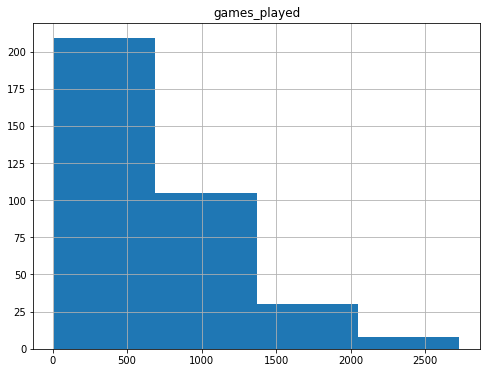

In [ ]:
#plotting the histogram for 'games_played' column
data.hist(column=['games_played'],bins=4, figsize=(8,6))

The histogram plotted below displays the number of years played by the players in the dataset. It can be seen that majority of the players had a playing career of less than 10 years.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f504208fe10>]],
      dtype=object)

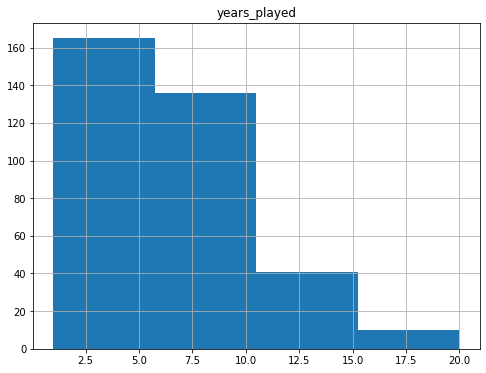

In [ ]:
#plotting the histogram for 'years_played' column
data.hist(column=['years_played'],bins=4, figsize=(8,6))

The bar chart plotted below displays the number of playes per category in the dataset. It indicates that majority of the players in the dataset were outfield players; these were areound 140 out of the total 352. This was followed by cacthers with 50 players and shortstop with about 45 players. Players with position thirdbase are in the least amount in the datatset

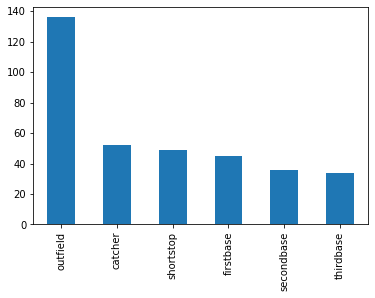

In [ ]:
#plotting the bar chart for value counts of 'player_position' column
data['player_position'].value_counts().plot(kind='bar')

###Visualizing relaationship between a pair of continuous variables

Correlation between the no of games played by the player and the salary they are getting

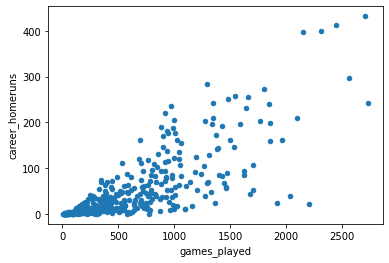

In [ ]:
#plotting a scatter plot to observe any relation between 'games_played' and 'career_homeruns'
data.plot.scatter(x = 'games_played', y = 'career_homeruns')

In [ ]:
#using .corr function to get the mathematical value of the correlation between games played and career homeruns
correlation = data['games_played'].corr(data['career_homeruns'])
print(correlation)

0.7681645421150064


The correlation between games played by the players and career homeruns is 0.768. It can be observed from the graph that a best fit line would have a positive slope although there are many scattered points and obtaining a best fit will be a difficult task. Generally a correlation of 0.8 is considered to be significant, in our case it is 0.77 hence it is very close to being significant and we can conclude that games played and career homeruns are moderate-strongly and positively correlated.

###Displaying unqiue values of categorical variable

In [ ]:
#unqiue values for player position column
data['player_position'].unique()

array(['shortstop', 'firstbase', 'thirdbase', 'outfield', 'catcher',
       'secondbase'], dtype=object)

The unique values for player position column are: 

Shortstop

Firstbase

Thrirdbase

Outfield

Catcher

Secondbase

###Contingency table and statistical test of independence

Contingency table for the two categorical variables in the data; race and player_position

In [ ]:
#contingency table for 'race' and 'player position' 
data_crosstab = pd.crosstab(data['player_position'],
                            data['race'], 
                               margins = False)
print(data_crosstab)

race             black  hispanic  white
player_position                        
catcher              2         7     43
firstbase           10         9     26
outfield            72        19     45
secondbase           8         7     21
shortstop            7        19     23
thirdbase            9         3     22


It can be seen that the most number of mlb players were white, across all playing positions. Majority players playing in the outfield were black.

Chi Square test for independence bewteen player position and race

The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the data; they are independent.

In [ ]:
#using scipy.stats to conduct the chi square test for player position and race
from scipy.stats import chi2_contingency
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

chisq_of_df_cols(data, 'player_position', 'race')


(76.62632929810103,
 2.2934333235364454e-12,
 10,
 array([[15.95454545, 13.80681818, 41.72727273, 11.04545455, 15.03409091,
         10.43181818],
        [ 9.45454545,  8.18181818, 24.72727273,  6.54545455,  8.90909091,
          6.18181818],
        [26.59090909, 23.01136364, 69.54545455, 18.40909091, 25.05681818,
         17.38636364]]))

There is a relationship between race and the player position, X^2(6) = 76.63, p< 0.0001.

We get a p-value of less tha 0.0001 which is significantly lower than than 0.5. Therefore, we will reject the null hypothesis that says there is no relationship between the player position and race. The test result detects a significant relationship between the variables.

###Subset of data and descriptive statistics

Getting a subset for players that have played more than 600 games and have a career batting average of 250 or more. Generally this would mean that these are very good players

In [ ]:
#subset of data with all players having played more than 600 games and having career average greater than 250
data_sub1 = data[(data['games_played'] >= 600) & (data['career_batting_average'] >= 250)]
#stats for the subset data
data_sub1.describe(include='all')

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,1.300000e+02,130,130,1.300000e+02,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
unique,NaN,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,outfield,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.392517e+06,NaN,NaN,3.265133e+07,9.846154,1164.184615,4089.453846,564.053846,1130.576923,199.007692,...,105.638462,511.153846,273.815385,405.792308,602.476923,139.415385,979.000000,73.447379,15.533689,11.018933
std,1.510078e+06,NaN,NaN,7.489892e+06,3.281287,476.310217,1932.653444,313.352176,569.623225,104.479626,...,90.586462,306.302289,17.148591,247.767042,337.401843,155.241137,10.990482,14.038485,12.218299,8.932270
min,1.500000e+05,NaN,NaN,8.854000e+06,5.000000,616.000000,1569.000000,79.000000,408.000000,19.000000,...,5.000000,123.000000,250.000000,95.000000,140.000000,0.000000,939.000000,20.296300,3.741786,0.540870
25%,8.625000e+05,NaN,NaN,2.712723e+07,7.000000,788.250000,2747.500000,339.500000,718.250000,124.000000,...,39.000000,292.750000,260.000000,226.250000,342.250000,33.250000,973.000000,67.668960,8.007545,2.887507
50%,2.425000e+06,NaN,NaN,3.558646e+07,9.000000,998.000000,3373.500000,476.000000,925.000000,174.000000,...,80.500000,428.000000,269.000000,329.000000,528.500000,91.500000,981.000000,73.642940,13.871620,10.877800
75%,3.483333e+06,NaN,NaN,3.779200e+07,11.750000,1419.250000,5187.250000,719.500000,1403.000000,251.000000,...,160.750000,651.750000,285.000000,499.000000,752.000000,193.500000,987.000000,82.948860,17.528360,16.330650


In [ ]:
#number of rows in subset
print(data_sub1.shape)

(130, 19)


It can be seen that the data has 130 records. 
The frequency, counts, mean, standard deviation, maximum value, minimum value, median, upper quartile and lower quartile for each column has been displayed in the table.

Getting a subset for players that have played less than 600 games and have a career batting average of 250 or more

In [ ]:
#subset of data with all players having played less than 600 games and having career average greater than 250
data_sub2 = data[(data['games_played'] <= 600) & (data['career_batting_average'] >= 250)]
#stats for the subset data
data_sub2.describe(include='all')

,salary,player_position,race,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,...,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
count,1.060000e+02,106,106,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
unique,NaN,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,outfield,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.609601e+05,NaN,NaN,2.850976e+07,3.613208,299.603774,932.886792,120.547170,254.330189,47.773585,...,20.452830,110.292453,274.981132,85.811321,150.500000,24.216981,974.066038,73.464986,16.064342,10.470671
std,8.376925e+05,NaN,NaN,9.753724e+06,1.732440,172.845909,588.202546,79.934394,160.784607,45.480144,...,20.266854,78.067000,47.742360,68.858048,101.280116,32.462141,25.696866,14.343872,11.738409,9.795165
min,1.090000e+05,NaN,NaN,8.854000e+06,1.000000,7.000000,7.000000,1.000000,4.000000,0.000000,...,0.000000,2.000000,250.000000,0.000000,0.000000,0.000000,800.000000,20.296300,3.741786,0.540870
25%,2.106250e+05,NaN,NaN,2.284083e+07,2.000000,151.500000,433.250000,58.250000,116.500000,22.250000,...,5.000000,50.250000,257.250000,34.250000,71.500000,2.000000,966.250000,67.668960,9.049699,1.922861
50%,4.000000e+05,NaN,NaN,2.739693e+07,3.000000,293.500000,904.500000,110.500000,244.000000,38.500000,...,12.500000,98.000000,265.000000,72.500000,135.000000,12.500000,979.500000,74.619650,15.244320,5.743671
75%,1.000000e+06,NaN,NaN,3.697431e+07,5.000000,437.750000,1454.000000,180.000000,385.000000,69.750000,...,32.750000,167.750000,278.500000,119.500000,224.000000,32.750000,988.000000,82.948860,17.528360,16.330650


In [ ]:
#number of rows in subset
print(data_sub2.shape)

(106, 19)


It can be seen that the data has 106 records. 
The frequency, counts, mean, standard deviation, maximum value, minimum value, median, upper quartile and lower quartile for each column has been displayed in the table.

###Statistical test of significance between the subsets of data

Hypothesis: 

Null hypotheses: Means for both subsets is equal

Alternative hypotheses: Mean for both subsets is different (two-tailed)

In [ ]:
#importing libraries from scipy for calculations
from scipy import *
from scipy import stats

In [ ]:
#dropping non numerical columns
data_sub1 = data_sub1.drop(['race', 'player_position'], axis = 1)
data_sub2 = data_sub2.drop(['race', 'player_position'], axis = 1)

In [ ]:
#conducting the TTest between both subsets
from scipy.stats import ttest_ind

res = stats.ttest_ind(data_sub1['salary'], data_sub2['salary'], 
                      equal_var=True)

display(res)

Ttest_indResult(statistic=9.943659533545736, pvalue=1.167778412800307e-19)

The p-value of the test is very less (<0.0001), which is less than the significance level alpha (e.g., 0.05). Furthermore, this means that we can conclude that the average salary for group 1 is statistically different from the average salary of group 2. 

###Group by categorical variable

In [ ]:
#grouping the data by categorical variable 'player_position' on mean
grouped = data.groupby(['player_position']).mean()
grouped.head()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
player_position,,,,,,,,,,,,,,,,,,,
catcher,8.925192e+05,3.071882e+07,5.826923,426.211538,1249.980769,125.980769,317.038462,58.384615,4.711538,26.326923,144.269231,245.230769,108.365385,189.865385,8.980769,987.346154,70.606099,17.722902,11.670999
firstbase,1.586781e+06,3.193299e+07,6.200000,702.511111,2462.711111,347.933333,692.266667,131.111111,14.888889,84.911111,362.755556,275.533333,277.711111,381.555556,40.844444,987.733333,73.361788,16.817574,9.820638
outfield,1.539324e+06,3.025301e+07,6.536765,706.044118,2416.808824,339.102941,657.654412,112.992647,22.338235,70.625000,308.529412,259.500000,235.610294,417.897059,102.808824,976.823529,72.719652,15.720545,11.559803
secondbase,1.170208e+06,3.084326e+07,6.250000,677.500000,2211.138889,298.555556,599.611111,100.527778,16.472222,28.083333,215.166667,260.611111,231.777778,281.361111,71.333333,975.666667,70.926002,16.596534,12.477464
shortstop,1.069211e+06,3.092724e+07,6.326531,632.918367,2037.653061,251.530612,526.326531,93.653061,17.857143,26.795918,194.387755,249.673469,169.285714,265.857143,55.469388,967.367347,73.194975,16.603038,10.201988


The data has been grouped by mean with respect to the categories in player position variable. The resulted table shows the means for all columns for each category in the player position variable.

###Linear Regression

Using linear regression to predict MLB player salaries based on selected features

In [ ]:
#importing useful libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

Checking for feature correlation to select the best features for linear regression

In [ ]:
#checking correlation of each column with every other column
data.corr()

,salary,team_payroll,years_played,games_played,career_at_bats,career_runs,career_hits,career_doubles,career_triples,career_homeruns,career_runs_batted_in,career_batting_average,career_walks,career_strike_outs,career_stolen_bases,career_fielding_percent,white_percent_in_city,black_percent_in_city,hispanic_percent_in_city
salary,1.000000,0.220123,0.473349,0.584546,0.611377,0.643348,0.619335,0.622921,0.468960,0.604904,0.644419,0.279291,0.581829,0.538225,0.362984,0.066248,0.002438,0.025942,-0.040298
team_payroll,0.220123,1.000000,0.174519,0.172700,0.168567,0.208775,0.167737,0.156786,0.156106,0.134528,0.156838,0.081330,0.149743,0.164550,0.121119,-0.042996,-0.165353,0.216582,-0.042585
years_played,0.473349,0.174519,1.000000,0.941154,0.899723,0.839877,0.882268,0.840570,0.741593,0.671924,0.821112,0.194804,0.813086,0.763459,0.556820,0.109930,0.066391,0.004651,-0.111590
games_played,0.584546,0.172700,0.941154,1.000000,0.988525,0.937213,0.977303,0.937346,0.822149,0.768165,0.923399,0.264715,0.905553,0.832479,0.608380,0.091794,0.085276,-0.034405,-0.086610
career_at_bats,0.611377,0.168567,0.899723,0.988525,1.000000,0.955979,0.994441,0.957113,0.841857,0.789660,0.943223,0.284668,0.909050,0.833115,0.626594,0.076934,0.096377,-0.050372,-0.081746
career_runs,0.643348,0.208775,0.839877,0.937213,0.955979,1.000000,0.963228,0.929416,0.854123,0.756055,0.900212,0.307602,0.907716,0.782044,0.698237,0.068478,0.087239,-0.038315,-0.084224
career_hits,0.619335,0.167737,0.882268,0.977303,0.994441,0.963228,1.000000,0.963755,0.852151,0.779407,0.941788,0.318535,0.909560,0.805973,0.631485,0.077727,0.101227,-0.058507,-0.077995
career_doubles,0.622921,0.156786,0.840570,0.937346,0.957113,0.929416,0.963755,1.000000,0.792769,0.795178,0.935105,0.311524,0.882573,0.783596,0.547216,0.065717,0.118497,-0.065035,-0.096152
career_triples,0.468960,0.156106,0.741593,0.822149,0.841857,0.854123,0.852151,0.792769,1.000000,0.510482,0.713132,0.268499,0.724018,0.650191,0.747898,0.056645,0.086989,-0.051328,-0.065548
career_homeruns,0.604904,0.134528,0.671924,0.768165,0.789660,0.756055,0.779407,0.795178,0.510482,1.000000,0.931284,0.195461,0.780489,0.833286,0.321691,0.045939,0.086471,-0.056637,-0.057271


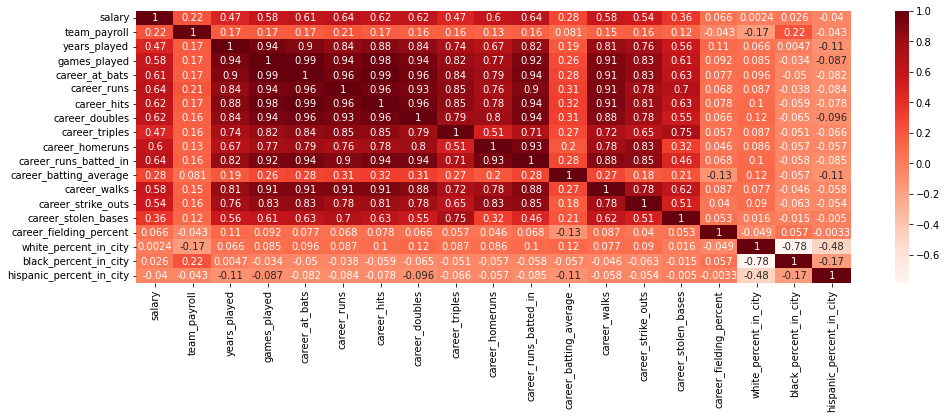

In [ ]:
#plotting a correlation heatmap to depict the above table results
plt.figure(figsize=(16,5))
sns.heatmap(data.corr(), annot=True, cmap = 'Reds')
plt.show()

Features having a relatively higher correlation to 'salary' are selected for the Linear Regression

Target Variable: Salary

Features selected in accordance with the above plotted correlation:

1) career_at_bats

2) career_runs

3) career_hits

4) career_doubles

5) careers_runs_batted_in

6) career_homeruns


In [ ]:
#X_features contaians only the features that we have selected for linear regression
X_features = data[['career_at_bats', 'career_runs', 'career_hits', 'career_doubles', 'career_runs_batted_in', 'career_homeruns']]
#y_salary is the target
y_salary = data.salary


In [ ]:
#splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_features, y_salary, test_size = 0.2, random_state=5)

Data has been split into training and test sets at a ratio of 80:20

In [ ]:
#normalize df columns
X_features=(X_features-X_features.mean())/X_features.std()

In [ ]:
#defining the linear regression model and fitting it onto our training dataset
reg_1 = LinearRegression()
reg_1.fit(X_train, Y_train)
#predicting the salaries in the test set
y_predict = reg_1.predict(X_test)
y_predict

array([ 923536.97561262,  846907.46232719, 1448992.98872429,
        891302.27899489,  625095.90571465,  852427.91697485,
        617261.51739777,  696262.35099132,  610261.82776624,
       1596577.86911541, 1472391.69066415, 1013213.84373988,
       2628931.14892445, 2306841.1427951 , 1481655.21164451,
       2566539.58043146, 1201061.06702934,  795890.16584902,
       2881468.95685409,  772883.7606389 ,  678283.22010144,
        657778.7396511 , 2091002.61857377, 1640916.28111004,
       2019420.07717586,  590921.38198363,  749810.33803709,
       1722249.71136863,  958731.16013657,  924091.47146434,
       1156364.35320447,  658518.0620794 , 1697576.94385312,
       1794242.15928434, 1202393.72910657, 1997404.45771362,
        867228.28628341, 2424844.09817915, 2837910.28690746,
       1335656.95903175,  758917.17036795,  805598.38327168,
        623824.22570479, 1090148.47498132, 2024853.16150337,
        589023.49215303, 1478425.53263069, 3422902.21555389,
        609185.72980494,

Evaluating the performance of the model with 

-Root Mean Square Error

-R2 SCORE

--Mean absolute error

In [ ]:
#evaluating the predictions
rmse = (np.sqrt(mean_squared_error(Y_test, y_predict)))
r2 = round(reg_1.score(X_train, Y_train),2)
mae = mean_absolute_error(Y_test, y_predict)
print("Linear Regression performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MAE is {}'.format(mae))
print('R2 score is {}'.format(r2))
print("\n")

Linear Regression performance
--------------------------------------
RMSE is 984046.2457905586
MAE is 750402.3490785967
R2 score is 0.45




The MAE is a linear score which means that all the individual differences are weighted equally in the average. The RMSE is a quadratic scoring rule which measures the average magnitude of the error. Both of these scores are very high for the model. Generally, the lower the RMSE, the better a given model is able to fit a dataset. In this case, high scores indicate that the model is not predicting the player's salaries accurately. The R2 score; which is the coeffiecient of determination further cements this claim. It is 0.45, which means that only 45% of the data fit the regression model. A plot to further evaluate the model is displayed below

Plotting the predictions versus the actual data points for a visual depiction of the perfoemance of linear regression

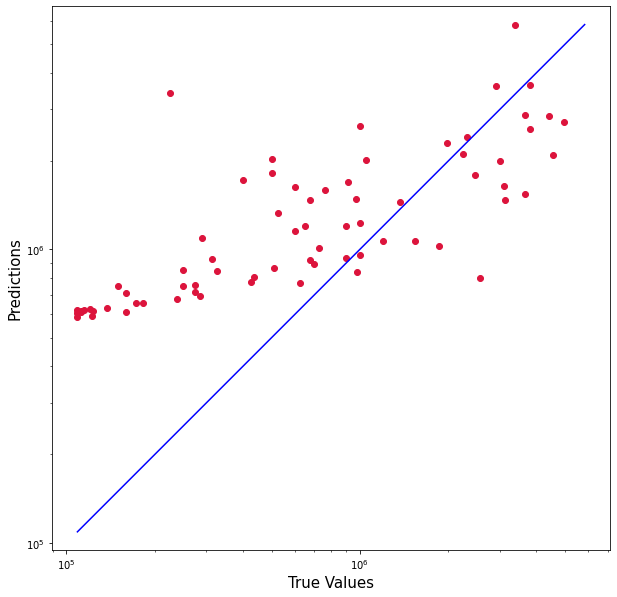

In [ ]:
#evaluating via graph
plt.figure(figsize=(10,10))
plt.scatter(Y_test, y_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict), max(Y_test))
p2 = min(min(y_predict), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

The plot confirms that the predicted values are not accurate, a major deviation between the line and the data points can be observed. 

###Conclusion

The main conclusions from the analysis and regression are as follows:

The majority of players in the dataset had a career spanning over less than 1400 games and less than 10 years. Of all the players, about 40% were outfield players; which is the highest for any player category within the dataset. Further, as obvious as it seems , a positive correlation between the games played by the players and their career homeruns was observed. More than 50% of the players were white however the majority of outfield players were of black race. Moreover, no significant relationship between the player positions and race was observed after conducting a chi square test. The average salary of players having played more than 600 games and having a batting average greater than 250 was different from the ones that had played less than 600 games and had a batting average of more than 250.

The Linear Regression did not perform accurately as it was expected; very high RMSE and MAE values were observed. The predictions deviated from the actual values to a significantly high extent. 



In [1]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Analysis on MLB Data.ipynb')

--2022-04-22 16:14:41--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-04-22 16:14:41 (39.2 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Analysis on MLB Data.ipynb to pdf
[NbConvertApp] Support files will be in Analysis on MLB Data_files/
[NbConvertApp] Making directory ./Analysis on MLB Data_files
[NbConvertApp] Making directory ./Analysis on MLB Data_files
[NbConvertApp] Making directory ./Analysis on MLB Data_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'